# Artificial Intelligence Course - Fall 1402
## Computer Assignment #1 - Genetic Algorithm (Curve Fitting)

### Mehdi Jamalkhah, SID: 810100111


### Table of Contents<a id='toc0_'></a>    
- [Problem Description](#toc1_)    
- [Introduction](#toc2_)    
- [Define Gen and Ghromosome](#toc3_)    
- [Generate The Initial Population](#toc4_)    
- [Define Fitness](#toc5_)    
- [Implement Crossover Function](#toc6_)    
- [Implement Mutation Function](#toc7_)    
- [Produce Next Generation](#toc8_)    
- [Replace Population](#toc9_)    
- [Evaluate Algorithm](#toc10_)    
  - [Example #1](#toc10_1_)    
  - [Example #2](#toc10_2_)    
  - [Example #3](#toc10_3_)    
- [Further Discussions](#toc11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>Problem Description [](#toc0_)
In this project, we are dealing with the problem of curve fitting. In this problem, we need to determine the coefficients of a polynomial expression based on the given points. The goal is to find the relationship between the independent variable $x$ and the dependent variable $y$ based on the given points. Consider the following given points as an example:

$$
a = [0,\space 1] \quad
b = [1, \space 0] \quad
c = [2, \space -5] \quad
d = [-1, \space -8]
$$
These four points lie on the curve of the equation $y = 1 + 3x - 5x^{2} + x^{3}$. The inputs of the problem include the desired degree of the polynomial, the range of coefficients, and several points on it. Note that the number of given points may not necessarily be sufficient to uniquely determine the polynomial and it is possible to have fewer points than necessary for this task. For simplicity, we assume that the desired coefficients in this problem are always real numbers.


## <a id='toc2_'></a>Introduction [](#toc0_)
One approach to solve the curve fitting problem within the scope of AI is through the utilization of genetic algorithms. Our project will involve a step-by-step implementation of this algorithm, followed by an evaluation process where we will answer specific questions aimed at enhancing our comprehension of this algorithem.

## <a id='toc3_'></a>Define Gen and Ghromosome [](#toc0_)
Assuming that each coefficient is considered a gene, the collection of all coefficients forms a chromosome. In general, we have:
$$
a_{0} + a_{1}x + a_{2}x^{2} + \dots + a_{n}x^{n} \quad \rightarrow \quad Chromosome = (a_{0},\space a_{1}, \space a_{2}, \dots, \space a_{n})
$$ 

## <a id='toc4_'></a>Generate The Initial Population [](#toc0_)
We generate a list of random chromosome as the initial population

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from math import floor

def initial_population(degree, lower, upper, size):
    population = []
    for i in range(size):
        population.append(random.choices(list(range(lower, upper + 1)), k=degree + 1))
    return population

## <a id='toc5_'></a>Define Fitness [](#toc0_)
To evaluate the quality of chromosomes, it is necessary to define a fitness function that quantifies the degree to which a particular solution aligns with the desired properties.

The fitness of a chromosome can be defined as the negative sum of the differences between the corresponding $Y(x)$ values obtained from the chromosome and the desired $y$ values at each point. The reason for negating the sum in this formula is to maximize the fitness instead of minimizing it. The formula can be expressed as follows:
$$
Fitness{(c_{0}, \space c_{1}, \space c_{2}, \dots, \space c_{n})} = -\sum_{i = 1}^{m}|y_{i} - Y(x_{i})|
$$
where,
$$
Y(x) = \sum_{i = 1}^{n}c_{i}x^{i}
$$
and $x_{1}, \space x_{2} \dots, \space x_{m}$ are given points.

In [2]:
def calculate_y(coefficients, x):
    z = 1
    y = 0
    for coef in coefficients:
        y += z * coef
        z *= x
    return y

def distance(coefficients, point):
    return abs(point[1] - calculate_y(coefficients, point[0]))

def fitness(chromosome, points):
    fit = 0
    for point in points:
        fit = fit - distance(chromosome, point)
    return fit

## <a id='toc6_'></a>Implement Crossover Function [](#toc0_)
To enhance the probability of generating superior chromosomes, we employ a crossover technique that involves pairing two parents and performing a crossover at multiple predetermined points, denoted by `num`. The value of `num` can be any positive integer and significantly influences the accuracy of the genetic algorithm. We will delve deeper into the impact of this parameter shortly.

During the crossover operation, we exchange segments between the selected points in the two parents, resulting in offspring that inherit genetic material from both parents.

In [3]:
def crossover(parent1, parent2, num):
    length = len(parent1)
    cross_points = sorted(random.sample(list(range(length - 1)), k=num))
    cross_points = [0] + cross_points + [length]
    offspring1 = []
    offspring2= []
    for i in range(1, len(cross_points)):
        if i % 2:
            offspring1.extend(parent1[cross_points[i - 1]:cross_points[i]])
            offspring2.extend(parent2[cross_points[i - 1]:cross_points[i]])
        else:
            offspring1.extend(parent2[cross_points[i - 1]:cross_points[i]])
            offspring2.extend(parent1[cross_points[i - 1]:cross_points[i]])
    return [offspring1, offspring2]

## <a id='toc7_'></a>Implement Mutation Function [](#toc0_)
For each offspring we apply bit-change with probability `pm` independently for each bit

In [4]:
def mutation(chromosome, pm, low_coeff, up_coeff):
    for i in range(len(chromosome)):
        if random.random() <= pm:
            num = chromosome[i]
            chromosome[i] = random.sample(list(range(low_coeff, num)) + list(range(num + 1, up_coeff + 1)), k=1)[0]
    return chromosome

## <a id='toc8_'></a>Produce Next Generation [](#toc0_)
In this particular approach, we adhere to the following steps:

1. Initially, we rank all chromosomes based on their fitness values, determining their relative positions within the population.
2. Each chromosome is then assigned a selection probability based on its rank, giving higher-ranked individuals a greater chance of being selected as parents.
3. During the mating process, we repeatedly select two parents and perform a crossover between them. The probability of crossover, denoted as `pc`, determines the likelihood of this operation taking place.
4. Following the crossover, a certain percentage (`pt`) of the newly generated offspring is transferred to the next generation, ensuring their inclusion in the evolving population.
5. The remaining portion of the offspring undergoes a mutation process, with each chromosome having a probability of `pm` for experiencing a mutation event.

By following these steps, we aim to create a diverse and evolving population that utilizes selection, crossover, and mutation to drive the genetic algorithm towards finding optimal solutions.

In [5]:
def ranked_population(population, points):
    fitnesses = [fitness(chromosome, points) for chromosome in population]
    ranked_pop = [x[1] for x in sorted(zip(fitnesses, population), reverse=True)]
    return ranked_pop

def new_population(population, points, pc, pm, pt, cross_points_num, low_coeff, up_coeff):
    size = len(population)
    ranked_pop = ranked_population(population, points)
    weights = [(size - i) / (size * (size + 1) / 2) for i in range(size)]
    parents = random.choices(ranked_pop, weights=weights, k=size)
    new_pop = []
    for i in range(0, size, 2):
        if random.random() < pc:
            new_pop.extend(crossover(parents[i], parents[i + 1], cross_points_num))
        else:
            new_pop.extend(parents[i:i+2])

    ranked_new_pop = ranked_population(new_pop, points)
    for i in range(floor(size * pt), size):
        ranked_new_pop[i] = mutation(ranked_new_pop[i], pm, low_coeff, up_coeff)
    return ranked_new_pop

## <a id='toc9_'></a>Replace Population [](#toc0_)
Finally, we consolidate all the functions within our algorithm. The process begins by creating an initial population consisting of `pop_size` chromosomes, where the value of `pop_size` is determined based on its potential impact on the algorithm's performance, which we will explore further in future discussions.

Next, we iterate through the algorithm `generation_num` times, generating new generations in each iteration. These new generations are created by selecting parents, performing crossovers, and applying mutations.

Finally, at the end of the iterations, we return the best chromosome from the last generation, which represents the most optimal solution found by the genetic algorithm.

By following this comprehensive approach, we aim to continually improve the quality of the population and ultimately converge towards the best possible solution.

In [6]:
def genetic_algorithm(points, degree, low_coeff, up_coeff, pop_size=100,
                        pc=0.5, pm=0.5, pt=0.2, cross_points_num=1, generation_num=100):
    population = initial_population(degree, low_coeff, up_coeff, pop_size)
    for i in range(generation_num):
        population = new_population(population, points, pc, pm, pt, cross_points_num, low_coeff, up_coeff)
    return ranked_population(population, points)[0]

## <a id='toc10_'></a>Evaluate Algorithm [](#toc0_)
To enhance result evaluation, it would be beneficial to plot the solutions generated by the algorithm alongside the given points on the same figure. This visual representation allows for a more intuitive comparison and analysis of the algorithm's performance.

In [7]:
def plot(points, chromosome, low_x, up_x):
    print("Fitness of Solution is:", fitness(result, points))
    chromosome.reverse()
    x = np.arange(low_x, up_x + 0.1, 0.1)
    plt.plot(x, np.polyval(chromosome, x), label='fitted curve')
    plt.plot([p[0] for p in points], [p[1] for p in points], 'ro', label='given points')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title("Result Evaluation")

Now we go through the three examples:

1. Using the given points at the beginning of the project.

2. Generating a polynomial curve and selecting points on it.

3. Creating a set of completely random points.

For each of these examples, we can apply the genetic algorithm, plot the solutions generated by the algorithm, and compare them with the respective points on the same figure. This visual representation will enable us to assess how well the algorithm performs in different scenarios and determine its effectiveness in finding solutions for varying types of datasets.

### <a id='toc10_1_'></a>Example #1 [](#toc0_)

Fitness of Solution is: 0


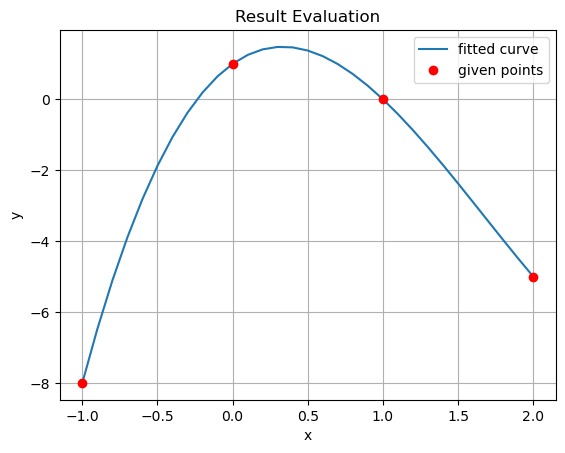

In [14]:
points = [[0, 1], [1, 0], [2, -5], [-1, -8]]

result = genetic_algorithm(points, degree=3, low_coeff=-10, up_coeff=10, pop_size=100, pc=0.8, pm=0.3, pt=0.2, cross_points_num=1,
                            generation_num=10000)

plot(points, result, -1, 2)

### <a id='toc10_2_'></a>Example #2 [](#toc0_)
In this example, we randomly generate a polynomial curve and select a set of points along this curve. These points will serve as the target for the genetic algorithm to approximate. By comparing the algorithm's output with the known points on the polynomial curve, we can evaluate its ability to capture the underlying pattern.

In [15]:
def create_points(num_pts, low_x, up_x, coefficients=[], low_y=0, up_y=0):
    x = random.choices(list(range(low_x, up_x + 1)), k=num_pts)
    if coefficients == []:
        y = [random.randint(low_y, up_y) for i in range(num_pts)]
    else:
        y = [calculate_y(coefficients, i) for i in x]
    return [list(i) for i in zip(x, y)]

Let's define some input variable

In [16]:
num_pts = 100
real_degree = 10
low_coeff = -10
up_coeff = 10
pop_size = 100
low_x = -100
up_x = 100
degree = 10

now we have:


Fitness of Solution is: -24197830


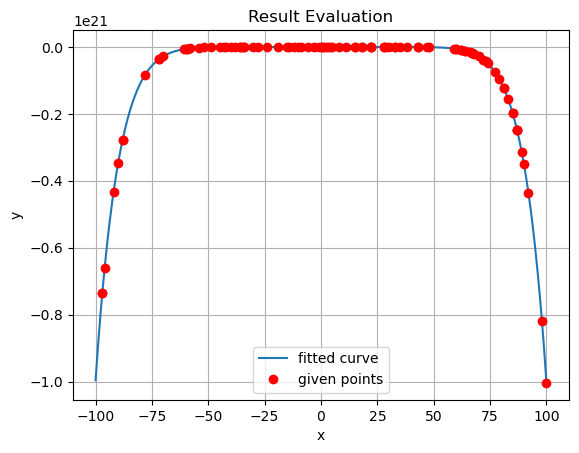

In [17]:
coefficients = [random.randint(low_coeff, up_coeff) for i in range(real_degree + 1)]
points = create_points(num_pts, low_x, up_x, coefficients=coefficients)
result = genetic_algorithm(points, 10, low_coeff, up_coeff,  pop_size, pc=0.8, pm=0.3, pt=0.2, cross_points_num=10, generation_num=10000)
plot(points, result, low_x, up_x)

### <a id='toc10_3_'></a>Example #3 [](#toc0_)
In this scenario, we generate a set of points completely at random, without any specific underlying pattern or function. The challenge for the genetic algorithm is to identify any potential patterns or structures within this random set and generate a solution that aligns with these points.

First we define some input variable. 

In [12]:
num_pts = 6
low_coeff = -100
up_coeff = 100
pop_size = 100
low_x = -10
up_x = 10
low_y = -10
up_y = 10
degree = 5

now create random points and run algorithm.

Fitness of Solution is: -256


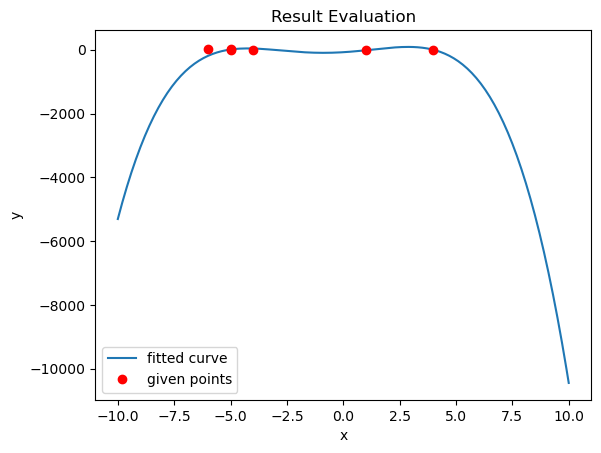

In [14]:
points = create_points(num_pts, low_x, up_x, low_y=low_y, up_y=up_y)
result = genetic_algorithm(points, degree, low_coeff, up_coeff,  pop_size, pc=0.8, pm=0.3, pt=0.2, cross_points_num=2, generation_num=10000)
plot(points, result, low_x, up_x)

## <a id='toc11_'></a>Further Discussions [](#toc0_)
1. **Population size**

    The population size refers to the number of individuals (potential solutions) in each generation of the algorithm.
    
    If the initial population size is very **small**, it can have the following effects:
    
    - *Limited Diversity*: A small population size leads to limited genetic diversity. With fewer individuals, there are fewer variations in the gene pool, which can result in a lack of exploration and limited search capability. This limited diversity may prevent the algorithm from converging to an optimal solution.
    
    - *Premature Convergence*: Due to the limited diversity, the algorithm may converge prematurely, meaning it reaches a suboptimal solution before exploring the full solution space.
    
    On the other hand, if the initial population size is very **large**:
    
    - *Higher Computational Cost*: A larger population size requires more computational resources and time to evaluate fitness, perform genetic  operations, and select individuals for the next generation.
    
    - *Redundancy*: A large population may contain redundant or similar individuals, which can slow down the convergence process. Redundancy increases the computational burden without contributing significantly to the algorithm's overall performance.


2.  **Dynamic population size**

    Which means population size **increases** with each generation:

    * Affect on **accurecy**:

        - *Improved Convergence*: With a growing population, the algorithm can potentially converge towards better solutions over time. Because there is a higher chance of including fitter individuals in subsequent generations, which leads to improved overall performance.

        - *Potential Redundancy*: With a dynamic population size, there is a possibility of including redundant or similar individuals in subsequent generations. Redundancy can slow down the convergence process and increase computational overhead without significantly improving the quality of solutions.

    * Affect on **speed**: Increased Computational Cost: As the population size grows, so does the computational cost.


3. **Crossover or mutation?**  

   It is indeed possible to have two good chromosomes, but there may be specific segments within those chromosomes that are superior to the rest. Through crossover, we provide an opportunity to select advantageous segments from different chromosomes and combine them to create an improved chromosome. However, there are instances when we desire certain qualities that are absent in any of the existing chromosomes. This is where mutation plays a role by introducing random changes to individual genes. 
    
    Both crossover and mutation are necessary components of the genetic algorithm because crossover can potentially generate improved chromosomes from existing ones, while mutation attempts to introduce features that are not present in any member of the population. By employing both of these mechanisms, we enhance the algorithm's ability to explore the solution space and find optimal or near-optimal solutions.


4. **Faster convergence**

    - *Reduce the search space*: Analyze the problem domain and try to narrow down the search space for the genetic algorithm.

    - *Optimize the fitness evaluation*: The fitness evaluation function is a crucial component of a genetic algorithm. This might involve using more efficient algorithms or data structures to calculate fitness values. In this case I implemented it in $O(n)$ which is the best time complexity that can be achived.

    - *Cutting off* the algorithm when we reach a good fitness value can be a reasonable approach in some cases, which save computational resources


5. **Local optimal**

    Insufficient population size can potentially result in being trapped in a local optimum when the desired features are not adequately represented. However, there are solutions to mitigate this issue. Firstly, ensuring a sufficiently large initial population is crucial. Secondly, increasing the probability of mutation or utilizing mutation more prominently can enhance the chances of obtaining the desired features and diversifying the population.


6. **Failed to find optimal solution**

    We can terminate the algorithm after a desired number of generations and then identify the best chromosome within the final generation.


7. **Time complexity - degree of polynomial**

    The time complexity of each step of algorithm is as below: ($n$ is the degree of polynomial, and $m$ is the number of given points)
    - Fitness: $O(nm)$
    - Crossover: $O(n^{2})$
    - Mutation: $O(n^{2})$

    so if we consider $(m \le n)$ the time complexity of algorithm would be $O(n^{2})$,  meaning that as the degree of the polynomial increases, the time required for evaluation grows at a squared rate.


8. **Time complexity - number of given points**

    As described above, the relationship between the time taken and the number of given points ($m$) is linear.
